<a href="https://colab.research.google.com/github/mohitphulsunge/DataScience-MachineLearning/blob/main/Learning_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Import the dataset

In [ ]:
mat = loadmat("ex5data1.mat")
X = mat["X"]
y = mat["y"]
Xval = mat["Xval"]
yval = mat["yval"]
Xtest = mat["Xtest"]
X

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945],
       [ -8.94145794],
       [ 15.30779289],
       [-34.70626581],
       [  1.38915437],
       [-44.38375985],
       [  7.01350208],
       [ 22.76274892]])

Visualize the data

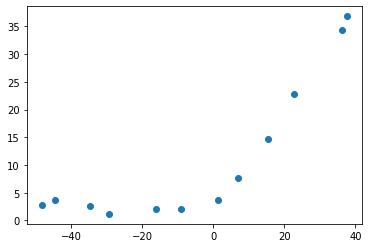

In [ ]:
plt.scatter(X, y)

Train the model using Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(X,y)
print(regressor.coef_)

[[0.36777923]]


Visualize

(100,)

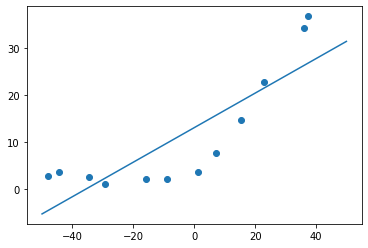

In [ ]:
plt.scatter(X, y)
eq_x = np.linspace(-50,50, 100)
plt.plot(eq_x, 13.08790351 + (0.36777923*eq_x)) 
eq_x.shape

Calculate errors

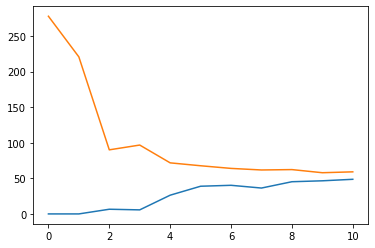

In [ ]:
train_error = []
cv_error = []
for i in range(1, len(X), 1):
    regressor = LinearRegression()
    regressor.fit(X[:i],y[:i])
    train_error.append(mean_squared_error(y[:i], regressor.predict(X[:i])))
    cv_error.append(mean_squared_error(yval, regressor.predict(Xval)))

plt.plot(train_error)
plt.plot(cv_error)


Feature Scaling

In [ ]:
def increasePower(X, p):
    for power in range(2, p+1, 1):
        X = np.concatenate((X, X[:,0].reshape(len(X[:,0]),1)**power), axis=1)
    return X

X_poly = increasePower(X, 8)
eq_x_poly = increasePower(eq_x.reshape(100, 1), 8)
eq_x_poly

Standarize

In [ ]:
sc_X = StandardScaler()
sc_X.fit(X_poly)
X_poly = sc_X.transform(X_poly)

sc_Y = StandardScaler()
sc_Y.fit(y)
y_poly = sc_Y.transform(y)

eq_x_poly_std = sc_X.transform(eq_x_poly)
eq_x_poly

Train the polynomial features

In [ ]:
regressor_poly = Ridge(alpha=1000.0)
regressor_poly.fit(X_poly,y_poly)
print(np.concatenate((y_poly, regressor_poly.predict(X_poly)), axis=1))
Z = regressor_poly.predict(sc_X.transform(increasePower(np.arange(-100,100,1).reshape(200,1), 8)))
# print(mean_squared_error(y_poly, regressor_poly.predict(X_poly)))

[[-7.27072067e-01  1.48369947e-03]
 [-8.03999728e-01 -7.15730062e-03]
 [ 1.85236554e+00  3.66876059e-02]
 [ 2.05078504e+00  3.94615629e-02]
 [-6.73069267e-01 -6.51124043e-02]
 [-7.28131707e-01  4.07431845e-03]
 [ 2.79571879e-01  1.35925211e-02]
 [-6.88660509e-01 -1.48448436e-02]
 [-5.98530732e-01  7.53163902e-03]
 [-5.99209543e-01 -4.41027975e-02]
 [-2.87356386e-01  9.64010008e-03]
 [ 9.23307474e-01  1.87458991e-02]]


Visulaize

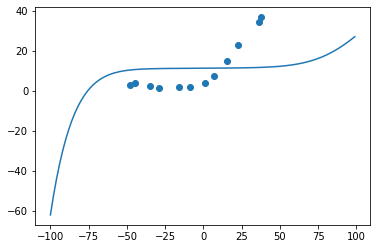

In [ ]:
plt.scatter(X, y)
plt.plot(np.arange(-100, 100, 1).reshape(200,1), sc_Y.inverse_transform(Z)) 

Calculate Errors

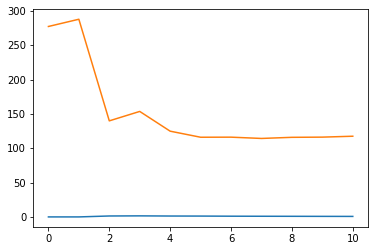

In [ ]:
train_error = []
cv_error = []
for i in range(1, len(X), 1):
    regressor_1 = Ridge(alpha=100)
    regressor_1.fit(X_poly[:i],y_poly[:i])
    train_error.append(mean_squared_error(y_poly[:i], regressor_1.predict(X_poly[:i])))
    cv_error.append(mean_squared_error(yval, sc_Y.inverse_transform(regressor_1.predict(sc_X.transform(increasePower(Xval, 8))))))

plt.plot(train_error)
plt.plot(cv_error)

Lambda vs error

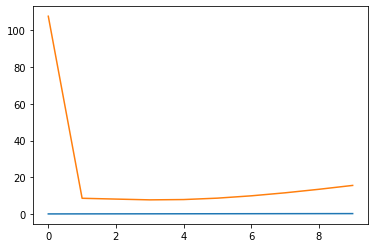

In [ ]:
train_error = []
cv_error = []
for al in range(0, 10, 1):
    regressor_2 = Ridge(alpha=al)
    regressor_2.fit(X_poly,y_poly)
    train_error.append(mean_squared_error(y_poly, regressor_2.predict(X_poly)))
    cv_error.append(mean_squared_error(yval, sc_Y.inverse_transform(regressor_2.predict(sc_X.transform(increasePower(Xval, 8))))))

plt.plot(train_error)
plt.plot(cv_error)